In [1]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format ='{:,.0f}'.format

In [2]:
#Загрузка данных
df=pd.read_excel('/datasets/new_history_03102023.xlsx')

In [3]:
#Информация о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171487 entries, 0 to 171486
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID Корпуса                171487 non-null  int64  
 1   ID ЖК                     171487 non-null  int64  
 2   ЖК рус                    171487 non-null  object 
 3   ЖК англ                   56952 non-null   object 
 4   Корпус                    171487 non-null  object 
 5   кр Корпус                 171487 non-null  object 
 6   Регион                    171487 non-null  object 
 7   ID кв                     171487 non-null  int64  
 8   Дата актуализации         171487 non-null  object 
 9   Комнат                    171487 non-null  int64  
 10  Площадь                   168124 non-null  float64
 11  Цена                      171169 non-null  float64
 12  Цена кв м                 167806 non-null  float64
 13  Этаж                      168961 non-null  f

In [4]:
#Информацию по типу помещения
df['Тип помещения'].value_counts()

Квартира         96358
Машино-место     36399
Кладовка         28387
Апартамент        8888
Нежилое           1038
Офис               168
Таунхаус(дом)      168
Кв/ап               81
Name: Тип помещения, dtype: int64

In [5]:
#Удаляем из данных строки с типом помещения: Машино-место, Кладовка, Нежилое, Офис 
save=['Квартира','Апартамент','Таунхаус(дом)','Кв/ап']
df=df[df['Тип помещения'].isin(save)]

In [6]:
#Проверяем изменения
df['Тип помещения'].value_counts()

Квартира         96358
Апартамент        8888
Таунхаус(дом)      168
Кв/ап               81
Name: Тип помещения, dtype: int64

In [7]:
#Удаление строк с пропусками по столбцам 'Цена' и 'Площадь'
df=df.dropna(subset=['Цена','Площадь'])

In [8]:
#Проверка пропусков после удаления
print('Пропусков в столбце "Площадь":',df['Площадь'].isna().sum())
print('Пропусков в столбце "Цена":',df['Цена'].isna().sum())

Пропусков в столбце "Площадь": 0
Пропусков в столбце "Цена": 0


In [9]:
#Создание итоговой таблицы
df_final=df.groupby(['Класс К','Комнат']).agg({'Площадь':'sum','Цена':'sum'})
df_final['Cредневзвешенная цена кв м в руб']=df_final['Цена']/df_final['Площадь']

df_final=df_final[['Cредневзвешенная цена кв м в руб']]
df_final

Cредневзвешенная цена кв м в руб
Класс К         Комнат                                  
бизнес          0                                354,397
                1                                460,655
                2                                422,617
                3                                432,035
                4                                454,190
де-люкс         0                              3,567,703
                1                              2,096,299
                2                              2,216,850
                3                              2,045,045
                4                              2,591,333
комфорт         0                                173,288
                1                                304,145
                2                                264,522
                3                                243,867
                4                                215,939
премиум         0                                880,746
                1                                853,852
                2                                744,513
                3                                785,822
                4                              1,039,899
эконом          0                                 55,383
                1                                203,654
                2                                182,502
                3                                173,142
                4                                172,921
эконом (панель) 1                                226,523
                2                                212,490
                3                                201,696
                4                                192,973

In [10]:
df_final=df_final.reset_index()

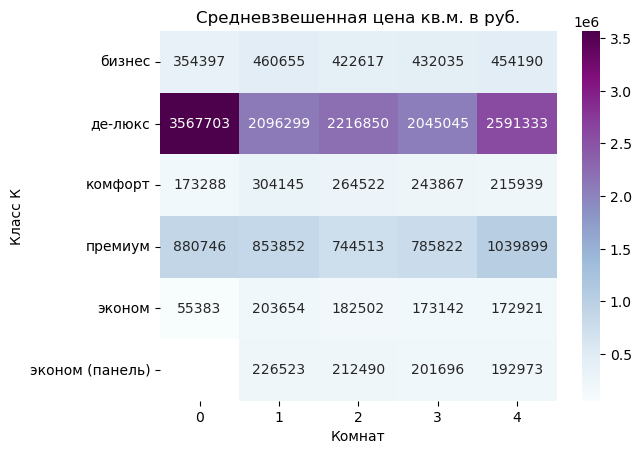

In [11]:
#Тепловая карта
df_for_heatmap = df_final.pivot(index="Класс К", columns="Комнат", values="Cредневзвешенная цена кв м в руб")
sns.heatmap(df_for_heatmap,annot=True,fmt=".0f",vmin=55383, vmax=3567703,cmap= 'BuPu')
plt.title('Cредневзвешенная цена кв.м. в руб.')
plt.show()

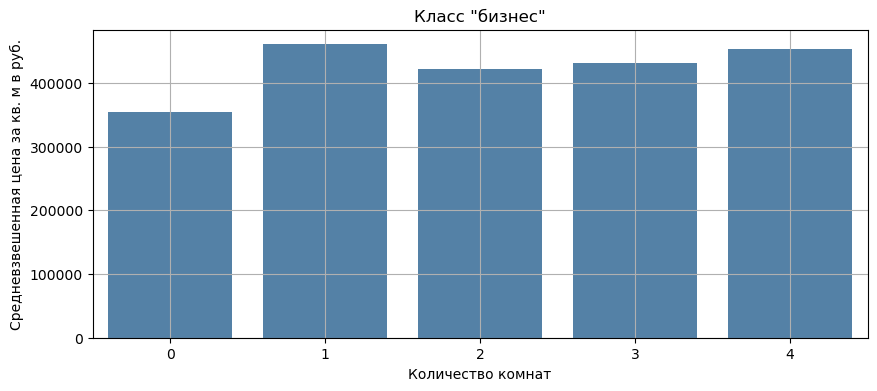

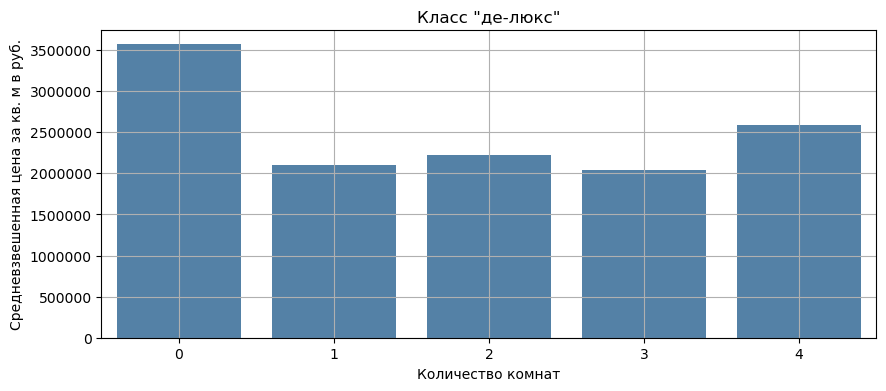

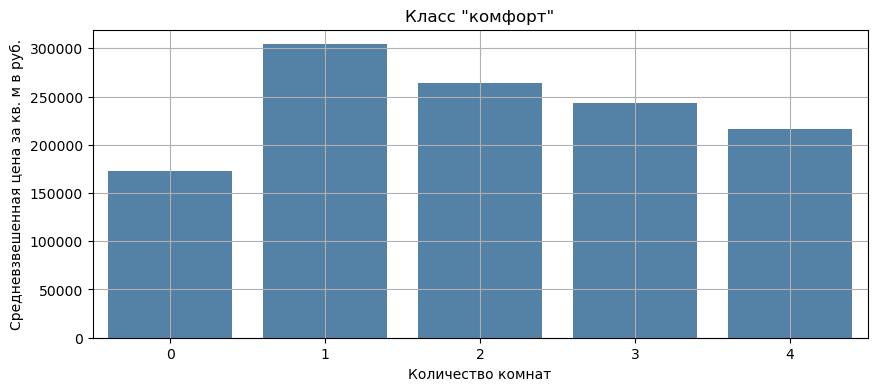

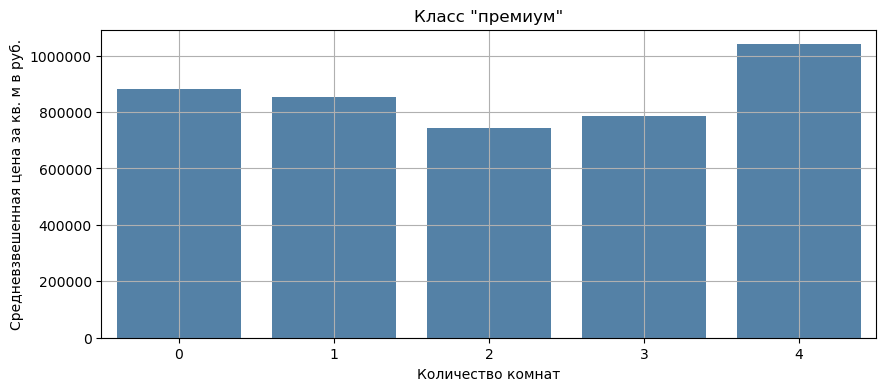

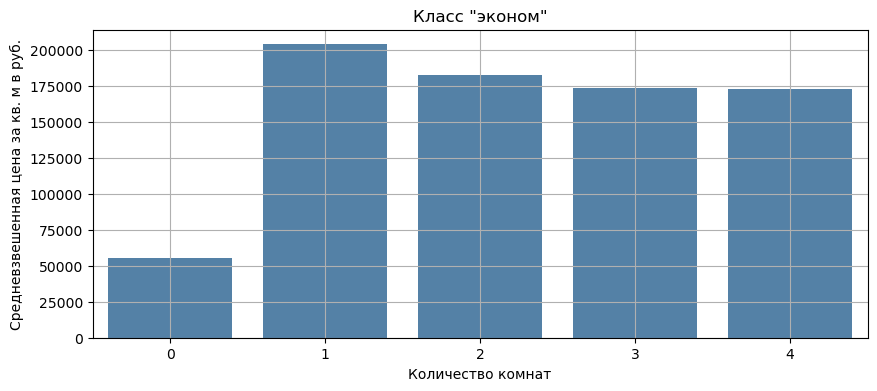

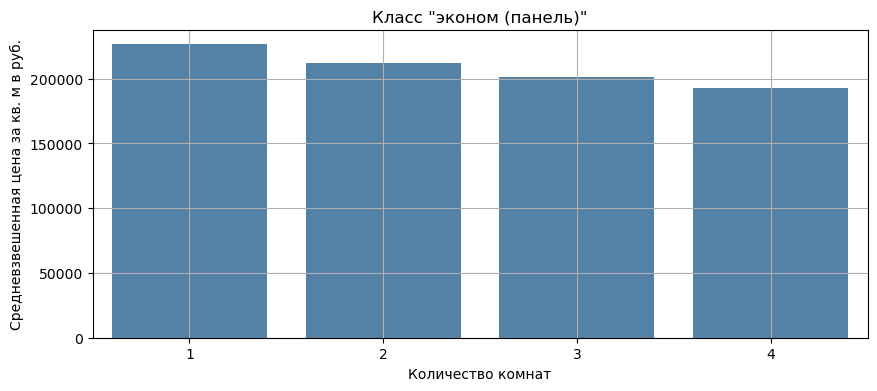

In [12]:
#Графики
for name in df_final['Класс К'].unique():
   fig, ax = plt.subplots(figsize=(10,4))
   ax.yaxis.get_major_formatter().set_scientific(False)
   ax.yaxis.get_major_formatter().set_useOffset(False)
   ax = sns.barplot(x = 'Комнат', y = 'Cредневзвешенная цена кв м в руб', data = df_final[df_final['Класс К']==name], color='steelblue')
   ax.set_title(f'Класс "{name}"')
   ax.set_ylabel('Средневзвешенная цена за кв. м в руб.')
   ax.set_xlabel('Количество комнат')
   plt.grid()
   plt.show()

Дополнительно проверим, с помощью изначальной колонки Цена кв м, почему квартиры с 0 комнат имеют существенно меньшую стоимость квадратного метра,чем остальные в классах: "Эконом", "Комфорт".

In [13]:
#Создаём таблицу только с классом 'эконом'
econom=df[df['Класс К']=='эконом']

In [14]:
#Проверяем количество предложений по количеству комнат
econom['Комнат'].value_counts()

1    9113
2    6194
3    2160
4     197
0      61
Name: Комнат, dtype: int64

Квартир эконом класса с 0 комнат предлагается очень мало.

In [15]:
#Отбираем квартиры класса эконом с 0 комнат
econom_0=df[(df['Класс К']=='эконом')&(df['Комнат']==0)]

In [16]:
#Посчитаем среднюю цену кв м по данным квартирам
econom_0['Цена кв м'].mean()

106896.80327868853

<Axes: >

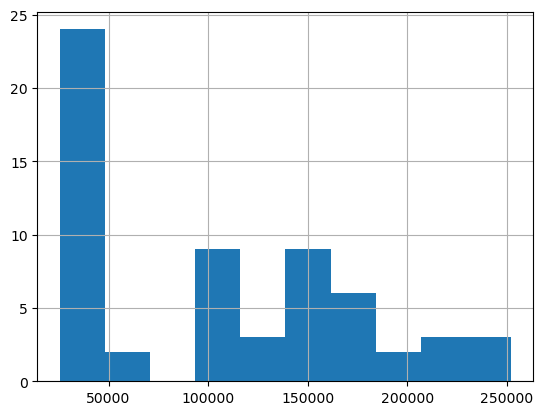

In [17]:
#Построим гистограмму
econom_0['Цена кв м'].hist()

В целом, квартир класса эконом с 0 комнат мало и большинство из них имеют стоимость кв м меньше 50000.

In [18]:
#Оставим в таблице только квартиры дешевле 50000 за кв м и отобразим несколько интересующих столбцов
econom_0_do_50=econom_0[econom_0['Цена кв м']<50000]
econom_0_do_50[['ЖК рус','Регион','Цена кв м', 'Застройщик']]

,ЖК рус,Регион,Цена кв м,Застройщик
140148,Варежки,Московская область,"25,632",СтройСервисКомплект
140149,Варежки,Московская область,"28,687",СтройСервисКомплект
140150,Варежки,Московская область,"29,157",СтройСервисКомплект
140151,Варежки,Московская область,"31,640",СтройСервисКомплект
140152,Варежки,Московская область,"32,818",СтройСервисКомплект
140153,Варежки,Московская область,"34,301",СтройСервисКомплект
140154,Варежки,Московская область,"34,301",СтройСервисКомплект
140155,Варежки,Московская область,"35,022",СтройСервисКомплект
140156,Варежки,Московская область,"35,175",СтройСервисКомплект
140157,Варежки,Московская область,"35,249",СтройСервисКомплект


Низкая стоимоть квадратного метра у квартир с 0 комнат класса "Эконом" обусловелена тем, что приемущественно, квартиры с такими характеристиками продаются в Московской области одним застройщиком и он предлагает довольно низкую цену за кв м.

Проанализируем по аналогии квартиры класса "комфорт".

In [19]:
#Создаём таблицу только с классом 'комфорт'
comfort=df[df['Класс К']=='комфорт']

In [20]:
#Проверяем количество предложений по количеству комнат
comfort['Комнат'].value_counts()

1    24685
2    18915
3     7899
4     1925
0      302
Name: Комнат, dtype: int64

Ситуация аналогичная — квартир "комфорт" класса с 0 комнат очень мало.

In [21]:
#Отбираем квартиры класса эконом с 0 комнат
comfort_0=df[(df['Класс К']=='комфорт')&(df['Комнат']==0)]

In [22]:
#Посчитаем среднюю цену кв м по данным квартирам
comfort_0['Цена кв м'].mean()

187263.17880794703

<Axes: >

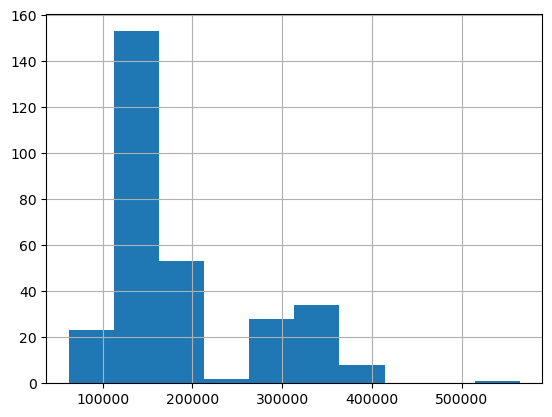

In [23]:
#Построим гистограмму
comfort_0['Цена кв м'].hist(bins=10)

Схожая картина и по графику, большинство квартир имеют цену до 160000 

In [24]:
#Оставим в таблице только квартиры дешевле 50000 за кв м и отобразим несколько интересующих столбцов
comfort_0_do_160=comfort_0[comfort_0['Цена кв м']<160000]
comfort_0_do_160[['ЖК рус','Регион','Цена кв м', 'Застройщик']].sort_values('Цена кв м')

,ЖК рус,Регион,Цена кв м,Застройщик
142643,Эдельвейс Комфорт,Московская область,"62,271",РИМЭКА
142645,Эдельвейс Комфорт,Московская область,"69,189",РИМЭКА
142644,Эдельвейс Комфорт,Московская область,"69,189",РИМЭКА
167983,Каскад Парк,Московская область,"97,262",Каскад
167984,Каскад Парк,Московская область,"98,018",Каскад
...,...,...,...,...
142692,Эдельвейс Комфорт,Московская область,"148,276",РИМЭКА
142685,Эдельвейс Комфорт,Московская область,"150,783",РИМЭКА
142675,Эдельвейс Комфорт,Московская область,"151,721",РИМЭКА
131657,Дмитров Дом,Московская область,"155,129",Самолет


In [25]:
comfort_0_do_160['Регион'].value_counts()

Московская область    172
Name: Регион, dtype: int64

In [26]:
comfort_0_do_160['Застройщик'].value_counts()

Самолет    67
РИМЭКА     51
Каскад     37
Арс        17
Name: Застройщик, dtype: int64

Низкая стоимоть квадратного метра у квартир с 0 комнат класса "комфорт" обусловелена тем, что приемущественно, квартиры с такими характеристиками продаются в Московской области несколькими застройщиками и они предлагают низкую цену за кв м.